In [1]:
import numpy as np
from keras import backend as K
import tensorflow as tf
from DragonflyClient import *
from pspnet import PSPNet50
import utils
import matplotlib.pyplot as plt
from scipy.misc import imsave

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
K.set_session(sess)

In [4]:
pspnet = PSPNet50(nb_classes=150, input_shape=(473, 473),
                  weights="pspnet50_ade20k")

Keras model & weights found, loading...


In [5]:
client = DragonflyClient(ip='140.112.170.182', port=16665)

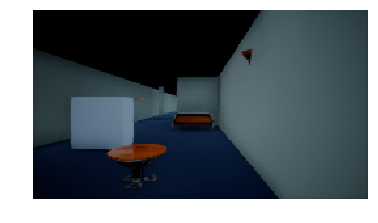

In [6]:
resp = client.simGetImages([ImageRequest(0, AirSimImageType.Scene, False, False)])
img = np.array(bytearray(resp[0].image_data_uint8)).reshape(144, 256, 4)[:, :, :3]
plt.imshow(img)
plt.axis('off')
plt.show()
imsave('images/original.jpg', img)

Input (144, 256) not fitting for network size (473, 473), resizing. You may want to try sliding prediction for better results.


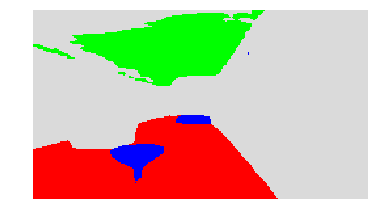

In [7]:
class_scores = pspnet.predict(img, False)
class_image = np.argmax(class_scores, axis=2)
mapped_class_image = utils.map_class_id(class_image)
colored_class_image = utils.color_class_image(mapped_class_image)
plt.imshow(colored_class_image)
plt.axis('off')
plt.show()
imsave('images/segmentation.jpg', colored_class_image)

In [ ]:
pspnet.predict(img, False)